<a href="https://colab.research.google.com/github/rogerioMB-hub/google_colab/blob/main/Perceptron02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [42]:
# criando um dataset para classificação.
#     100 amostras
n_pts = 100
#     2 centros, relativamente próximos
centers = [[-0.5, 0.5], [0.5, -0.5]]
#     gerando o dataset, com 100 amostras, uma semente fixa aleatória (=123, p.ex.),
#        com dois centroides de pontos para geração de dados e com
#        um desvio padrao de 0.4 entre as amostras geradas (isso faz com que as
#        amostras não sejam todas geradas, precisamente, no mesmo ponto). Qto maior o
#        cluster_std, mais espalhadas elas ficam do ponto inicial escolhido.
pts_, labels_ = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)

In [43]:
print(pts_.shape)       # os dados gerados estão em um array numpy de 2 dimensões
print(labels_.shape)    # os labels são arrays numpy de uma dimensão

print(pts_)             # como se pode observar
print(labels_)          # os labels indicam a que centroide pertence o ponto

(100, 2)
(100,)
[[-0.13715792 -0.07147228]
 [ 0.80437976 -0.37061246]
 [-0.60224775 -0.61943564]
 [ 0.57087693 -0.5119872 ]
 [ 0.0063745   0.15330384]
 [-0.87433355  0.97033162]
 [ 0.19742512 -0.37132537]
 [-0.6340043   0.91244578]
 [-0.48180397  0.40676318]
 [ 0.19748489  0.18077491]
 [-0.62590326  0.06563904]
 [-0.31262435  0.16753801]
 [-0.1085056   1.39525734]
 [ 0.09825765  0.92775707]
 [-0.36456438  0.4952678 ]
 [ 0.75682188 -1.29115517]
 [ 0.33484534  0.56577649]
 [-0.66134642  0.44958817]
 [ 0.34335208 -0.44400876]
 [-0.42758595  0.97114478]
 [-0.09837844  0.65447456]
 [ 0.45694611  0.66516486]
 [-0.12901503  0.43054573]
 [ 0.67045866 -1.1421639 ]
 [ 0.82493653 -0.30010394]
 [ 0.72261948 -0.58483205]
 [-0.49886163  0.77528908]
 [-0.03991778 -0.00694082]
 [ 1.05814117 -0.64357437]
 [ 0.60152659 -0.38650986]
 [ 0.57181979 -1.24479028]
 [-0.20505257  1.09629281]
 [ 1.14347639 -0.60809296]
 [-0.97932046  0.57980963]
 [ 0.20367449 -0.4708371 ]
 [-0.79298479  0.01499075]
 [ 0.5081264

In [44]:
# plotar os pontos com labels 0 em azul e com labels 1 em verde
def scatter_plot():
  plt.scatter(pts_[labels_==0, 0], pts_[labels_==0,1], c="blue")
  plt.scatter(pts_[labels_==1, 0], pts_[labels_==1,1], c="green")
  plt.show()

In [45]:
# os dados, para uso em redes neurais devem ser apresentados na forma de tensores
pts_data = torch.Tensor(pts_)
labels_data = torch.Tensor(labels_)

In [46]:
class Net(nn.Module):
  def __init__(self, input_size, output_size):
    super(Net, self).__init__()
    self.linear = nn.Linear(input_size, output_size)

  # aplica a função de ativação sobre a função ou modelo linear proposto
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred


In [47]:
torch.manual_seed(2)
modelo = Net(2, 1)
print(list(modelo.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [48]:
[w, b] = list(modelo.parameters())
w1, w2 = w.view(2)
b1 = b[0]

def get_params():
  return (w1.item(), w2.item(), b1.item())

print(get_params())


(0.1622033268213272, -0.1682732254266739, 0.1939089596271515)


In [49]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1*x1 + b1)/(-w2)
  plt.plot(x1, x2, 'r')
  scatter_plot()


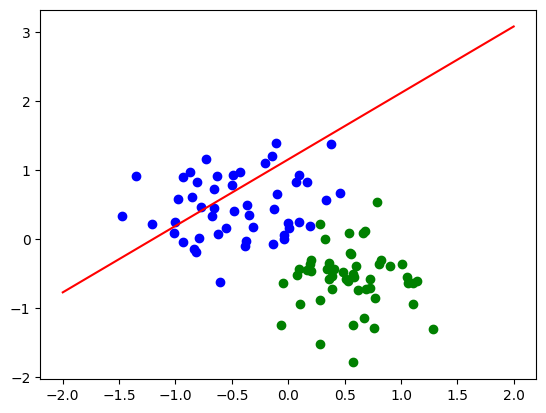

In [50]:
plot_fit('Inicial')